In [1]:
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import os
from os.path import exists
####################you will need to change some paths here!#####################
#output files
filename_out_nc='F:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/saildrone-gen_4-baja_2018-EP-sd1002-ALL-1_min-v1.nc'
#F:/data/cruise_data/saildrone/baja-2018/data_so_far.kml'
#################################################################################
import datetime as dt
import xarray as xr
from datetime import datetime
import pandas
import matplotlib as mpl
#import openpyxl
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
#from math import cos, radians
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset, date2index, num2date
from palettable import colorbrewer
from datetime import datetime, timedelta
from bs4 import BeautifulSoup
import requests
def listFD(url, ext=''):
    page = requests.get(url).text
    #print(page)
    soup = BeautifulSoup(page, 'html.parser')
    return [url + node.get('href') for node in soup.find_all('a') if (node.get('href').endswith(ext) and node.get('href').startswith('2'))]


In [2]:
import datetime as dt
from datetime import datetime
from math import atan2
from palettable import colorbrewer
from copy import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.mlab as mlaba
palette = copy(plt.cm.jet)
palette.set_over('r', 1.0)
palette.set_under('g', 1.0)
palette.set_bad(alpha = 0.0)

filename_out_nc='F:/data/cruise_data/saildrone/baja-2018/saildrone-gen_4-baja_2018-sd1002-20180411T180000-20180611T055959-1_minutes-v1.nc'
dataset = xr.open_dataset(filename_out_nc)
dataset = dataset.isel(trajectory=0)
ilen=(len(dataset.latitude['obs']))
lats_usv=dataset.latitude #[0,:]
lons_usv=dataset.longitude #[0,:]
print(lats_usv.shape)
tdim=len(lats_usv)
#dataset.time.dt.dayofyear

(86839,)


In [3]:
lats_usv.min()


<xarray.DataArray 'latitude' ()>
array(28.017683)
Coordinates:
    trajectory  float32 1002.0

In [13]:
str(textstr)[0:10]

'2018-04-11'

C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


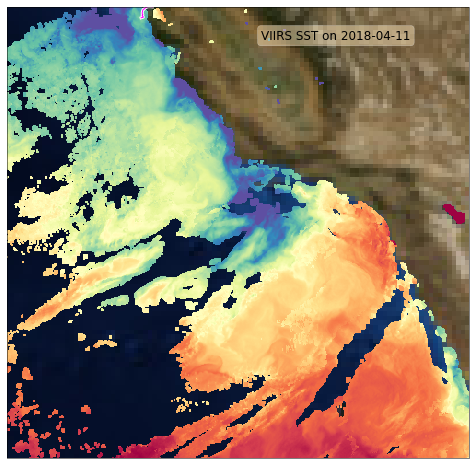

done
done


In [21]:
import cartopy.crs as ccrs
from cartopy.examples.arrows import sample_data
ds2=[]
for i in range(101,102): #162):
    filename = 'F:/data/cruise_data/saildrone/baja-2018/sat_data/virs_sst/sst'+str(i)+'.nc'
    ds = xr.open_dataset(filename)
    ds2.append(ds)
    ds.close()
    combined = xr.concat(ds2, dim='time')
    mn=combined.sea_surface_temperature.mean(dim='time')
    lat,lon=combined.lat,combined.lon
    cmap = colorbrewer.get_map('Spectral', 'diverging', 11, reverse=True).mpl_colormap
    fig = plt.figure(figsize=(11.7,8.3))
    ax = plt.subplot(111,projection=ccrs.PlateCarree())
    ax.background_img(name='BM', resolution='high')
#    ax.background_img(name='ne_shaded', resolution='low')
    lat_grid, lon_grid = np.meshgrid(lat, lon)
    cs = ax.pcolormesh(lon_grid,lat_grid, mn.transpose() - 273.15, cmap=cmap, vmin = 12, vmax = 19)
    sub_lons=lons_usv[dataset.time.dt.dayofyear==i]
    sub_lats=lats_usv[dataset.time.dt.dayofyear==i]
    ax.plot(sub_lons,sub_lats,'w', linewidth=3)
    ax.plot(sub_lons,sub_lats,color='magenta', linewidth=1)
    #ax.colorbar(location="bottom",label='SST [C]') # draw colorbar
    ax.set_extent((lons_usv.min(),lons_usv.max(),lats_usv.min(),lats_usv.max()))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    textstr = 'VIIRS SST on ' + str(dataset.time[dataset.time.dt.dayofyear==i][0].data)[0:10]
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
    plt.show()
    filename_png='F:/data/cruise_data/saildrone/baja-2018/figs/daily_cruise_viirs_ssts/cruise_sst_'+ str(i) +'.png'
    fig.savefig(filename_png, transparent=False, format='png')
    print('done')
    dx=1
    ax.set_extent((sub_lons.min()-dx,sub_lons.max()+dx,sub_lats.min()-dx,sub_lats.max()+dx))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    textstr = 'VIIRS SST on ' + str(dataset.time[dataset.time.dt.dayofyear==i][0].data)[0:10]
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
    plt.show()
    
    filename_png='F:/data/cruise_data/saildrone/baja-2018/figs/daily_cruise_viirs_ssts/cruise_sst_'+ str(i) +'_zoom.png'
    fig.savefig(filename_png, transparent=False, format='png')
    print('done') 


In [ ]:
ds2=[]
for i in range(101,102): #162):
    filename = 'F:/data/cruise_data/saildrone/baja-2018/sat_data/virs_sst/sst'+str(i)+'.nc'
    ds = xr.open_dataset(filename)
    ds2.append(ds)
    ds.close()
    combined = xr.concat(ds2, dim='time')
    mn=combined.sea_surface_temperature.mean(dim='time')
    lat,lon=combined.lat,combined.lon
    cmap = colorbrewer.get_map('Spectral', 'diverging', 11, reverse=True).mpl_colormap
    fig = plt.figure(figsize=(11.7,8.3))
    m = Basemap(projection='merc', lat_0 = 27, lon_0 = -120,    resolution = 'i', area_thresh = 0.1,    
                              llcrnrlon=-126.0, llcrnrlat=26.0,urcrnrlon=-114.0, urcrnrlat=39.)
    m.bluemarble()
    #    m.fillcontinents(color='grey',lake_color='white')
    lat_grid, lon_grid = np.meshgrid(lat, lon)
    x,y = m(lon_grid,lat_grid)
    cs = m.pcolormesh(x,y, mn.transpose() - 273.15, cmap=cmap, vmin = 12, vmax = 19)
#    sub_lons=lons_usv
#    sub_lats=lats_usv
    sub_lons=lons_usv[dataset.time.dt.dayofyear==i]
    sub_lats=lats_usv[dataset.time.dt.dayofyear==i]
    x,y = m(sub_lons,sub_lats)
    m.plot(x,y,'w', linewidth=3)
    m.plot(x,y,color='magenta', linewidth=1)
    m.colorbar(location="bottom",label='SST [C]') # draw colorbar

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    m.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)

    plt.show()
    filename_png='F:/data/cruise_data/saildrone/baja-2018/figs/daily_cruise_viirs_ssts/cruise_viirs_sst_ave.png'
    fig.savefig(filename_png, transparent=False, format='png')
    print('done') 


In [ ]:
ds2=[]
for i in range(100,162):
    filename = 'F:/data/cruise_data/saildrone/baja-2018/sat_data/virs_sst/sst'+str(i)+'.nc'
    ds = xr.open_dataset(filename)
    ds2.append(ds)
    ds.close()
combined = xr.concat(ds2, dim='time')
mn=combined.sea_surface_temperature.mean(dim='time')
lat,lon=combined.lat,combined.lon
cmap = colorbrewer.get_map('Spectral', 'diverging', 11, reverse=True).mpl_colormap
fig = plt.figure(figsize=(11.7,8.3))
m = Basemap(projection='merc', lat_0 = 27, lon_0 = -120,    resolution = 'i', area_thresh = 0.1,    
                          llcrnrlon=-126.0, llcrnrlat=26.0,urcrnrlon=-114.0, urcrnrlat=39.)
m.bluemarble()
#    m.fillcontinents(color='grey',lake_color='white')
lat_grid, lon_grid = np.meshgrid(lat, lon)
x,y = m(lon_grid,lat_grid)
cs = m.pcolormesh(x,y, mn.transpose() - 273.15, cmap=cmap, vmin = 12, vmax = 19)
sub_lons=lons_usv
sub_lats=lats_usv
x,y = m(sub_lons,sub_lats)
m.plot(x,y,'w', linewidth=3)
m.plot(x,y,color='magenta', linewidth=1)
m.colorbar(location="bottom",label='SST [C]') # draw colorbar
plt.show()
filename_png='F:/data/cruise_data/saildrone/baja-2018/figs/cruise_viirs_sst_ave.png'
fig.savefig(filename_png, transparent=False, format='png')
print('done') 


In [ ]:
d = dt.datetime(2018,5,10)
ds = xr.open_dataset('https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L4/GLOB/JPL/MUR/v4.1/2018/'+str(d.timetuple().tm_yday)+'/2018'+str(d.month).zfill(2)+str(d.day).zfill(2)+'090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc')
ds.close()
ds_sub = ds.sel(lat=slice(26,39),lon=slice(-126,-114))
mn,lat,lon = ds_sub.analysed_sst[0,:,:].copy(deep=True),ds_sub.lat,ds_sub.lon
#with mur
cmap = colorbrewer.get_map('Spectral', 'diverging', 11, reverse=True).mpl_colormap
fig = plt.figure(figsize=(11.7,8.3))
m = Basemap(projection='merc', lat_0 = 27, lon_0 = -120,    resolution = 'l', area_thresh = 0.1,    
                          llcrnrlon=-126.0, llcrnrlat=26.0,urcrnrlon=-114.0, urcrnrlat=39.)
m.bluemarble()
#    m.fillcontinents(color='grey',lake_color='white')
lat_grid, lon_grid = np.meshgrid(lat, lon)
x,y = m(lon_grid,lat_grid)
cs = m.pcolormesh(x,y, mn.transpose()-273.15, cmap=cmap, vmin = 13, vmax = 19)
sub_lons=lons_usv
sub_lats=lats_usv
x,y = m(sub_lons,sub_lats)
m.plot(x,y,'w', linewidth=3)
m.plot(x,y,color='magenta', linewidth=1)
m.colorbar(location="bottom",label='SST [C]') # draw colorbar
plt.show()
filename_png='F:/data/cruise_data/saildrone/baja-2018/figs/cruise_mur_sst_ave.png'
fig.savefig(filename_png, transparent=False, format='png')
print('done') 

In [ ]:
from palettable import colorbrewer
from copy import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.mlab as mlaba
palette = copy(plt.cm.jet)
palette.set_over('r', 1.0)
palette.set_under('g', 1.0)
palette.set_bad(alpha = 0.0)

tem_dyr=np.zeros(tdim)
for i in range(0,tdim):
    tem_dyr[i] = int(tem_date[i].timetuple().tm_yday)
#print(tem_dyr[tem_dyr==day_of_year])

istart_data=1
for incr_day in range(-57,1):
    d = datetime.today() + timedelta(days=incr_day)
    day_of_year = d.timetuple().tm_yday

    url = 'https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/' \
            + str(d.year) + '/' + str(day_of_year).zfill(3) + '/'
#    url = 'https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L2P/VIIRS_NPP/OSPO/v2.41/' \
#            + str(d.year) + '/' + str(day_of_year).zfill(3) + '/'
    ext = 'nc'

    filenames=listFD(url, ext)
    ilen=len(filenames)
    inew_data=1
    for ic in range(1,ilen):
        file = filenames[ic]
        print(file)
        #save which files have been processed
        idyj=int(file[101:104])
        ihr=int(file[113:115])
        imin=int(file[115:117])
        print(idyj,ihr,imin)

        nc = Dataset(file)
        sst = nc.variables['sea_surface_temperature'][:,2500:3250,2500:3500]
        sst = np.flip(sst, 2)
        cnt = ma.count(sst)
        lat = nc.variables['lat'][2500:3250]
        lat = np.flip(lat, 0)
        lon = nc.variables['lon'][2500:3500]
        nc.close()
        if istart_data==1:
            sst_new_all = ma.copy(sst)
            istart_data = 0
        if inew_data==1:
            sst_new = ma.copy(sst)
            inew_data = 0
        if cnt<5:
            continue
        print(ic,cnt,file)
        mask = sst_new < -10
        sst_new[mask] = sst[mask]
        sst_new_all[mask] = sst[mask]

    sst_new2 = sst_new[0,:,:]
    sstx = ma.masked_values (sst_new2, -9999.)
    sst3x = np.flip(sstx, 1)
    sst4x = np.flip(sst3x, 0)
    sst5x = ma.swapaxes(sst4x,0,1)
    
    cmap = colorbrewer.get_map('Spectral', 'diverging', 11, reverse=True).mpl_colormap
    fig = plt.figure(figsize=(11.7,8.3))
    m = Basemap(projection='merc', lat_0 = 27, lon_0 = -120,    resolution = 'l', area_thresh = 0.1,    
                              llcrnrlon=-126.0, llcrnrlat=25.0,urcrnrlon=-114.0, urcrnrlat=38.)
    m.bluemarble()
#    m.fillcontinents(color='grey',lake_color='white')
    lat_grid, lon_grid = np.meshgrid(lat, lon)
    x,y = m(lon_grid,lat_grid)
    cs = m.pcolormesh(x,y, sst5x - 273.15, cmap=cmap, vmin = 12, vmax = 19)
    sub_lons=lons_usv[tem_dyr==day_of_year]
    sub_lats=lats_usv[tem_dyr==day_of_year]
    x,y = m(sub_lons,sub_lats)
    m.plot(x,y,'w', linewidth=3)
    m.plot(x,y,color='magenta', linewidth=1)
    m.colorbar(location="bottom",label='SST [C]') # draw colorbar
    plt.show()
    filename_png='F:/data/cruise_data/saildrone/baja-2018/figs/cruise_sst_'+str(day_of_year)+'.png'
    fig.savefig(filename_png, transparent=False, format='png')
    print('done') 
    
    sub_lons=lons_usv[tem_dyr==day_of_year]
    sub_lats=lats_usv[tem_dyr==day_of_year]
    min_lon=min(sub_lons)-3
    max_lon=min(sub_lons)+3
    min_lat=min(sub_lats)-3
    max_lat=min(sub_lats)+3
    center_lon=.5*(max_lon-min_lon)+min_lon
    center_lat=.5*(max_lat-min_lat)+min_lat
    print(min_lon,max_lon,min_lat,max_lat,center_lon,center_lat)
    
    fig = plt.figure(figsize=(11.7,8.3))
    m = Basemap(projection='merc', lat_0 = center_lat, lon_0 = center_lon,    resolution = 'l', area_thresh = 0.1,    
                llcrnrlon=min_lon, llcrnrlat=min_lat,urcrnrlon=max_lon, urcrnrlat=max_lat)
    m.bluemarble()
#    m.fillcontinents(color='grey',lake_color='white')
    lat_grid, lon_grid = np.meshgrid(lat, lon)
    x,y = m(lon_grid,lat_grid)
    cs = m.pcolormesh(x,y, sst5x - 273.15, cmap=cmap, vmin = 12, vmax = 19)
    x,y = m(sub_lons,sub_lats)
    m.plot(x,y,'w', linewidth=3)
    m.plot(x,y,color='magenta', linewidth=1)
    m.colorbar(location="bottom",label='SST [C]') # draw colorbar
    plt.show()
    filename_png='F:/data/cruise_data/saildrone/baja-2018/figs/cruise_sst_'+str(day_of_year)+'_zoom.png'
    fig.savefig(filename_png, transparent=False, format='png')
    print('done')      

    sst_new2 = sst_new_all[0,:,:]
    sstx = ma.masked_values (sst_new2, -9999.)
    sst3x = np.flip(sstx, 1)
    sst4x = np.flip(sst3x, 0)
    sst5x = ma.swapaxes(sst4x,0,1)
    sub_lons=lons_usv
    sub_lats=lats_usv
    fig = plt.figure(figsize=(11.7,8.3))
    m = Basemap(projection='merc', lat_0 = 27, lon_0 = -120,    resolution = 'l', area_thresh = 0.1,    
                              llcrnrlon=-126.0, llcrnrlat=25.0,urcrnrlon=-114.0, urcrnrlat=38.)
    m.bluemarble()
    #m.fillcontinents(color='grey',lake_color='white')
    lat_grid, lon_grid = np.meshgrid(lat, lon)
    x,y = m(lon_grid,lat_grid)
    cs = m.pcolormesh(x,y, sst5x - 273.15, cmap=cmap, vmin = 12, vmax = 19)
    x,y = m(sub_lons,sub_lats)
    m.plot(x,y,'w', linewidth=3)
    m.plot(x,y,color='magenta', linewidth=1)
    m.colorbar(location="bottom",label='SST [C]') # draw colorbar
    plt.show()
    filename_png='F:/data/cruise_data/saildrone/baja-2018/figs/cruise_all_sst_track'+str(day_of_year)+'.png'
    fig.savefig(filename_png, transparent=False, format='png')
    print('done')   
    

In [ ]:
    sub_lons=lons_usv
    sub_lats=lats_usv
    fig = plt.figure(figsize=(11.7,8.3))

    m = Basemap(projection='merc', lat_0 = 27, lon_0 = -120,    resolution = 'l', area_thresh = 0.1,    
                              llcrnrlon=-126.0, llcrnrlat=25.0,urcrnrlon=-114.0, urcrnrlat=38.)
    m.bluemarble()
    #m.fillcontinents(color='grey',lake_color='white')

    lat_grid, lon_grid = np.meshgrid(lat, lon)
    x,y = m(lon_grid,lat_grid)
    cs = m.pcolormesh(x,y, sst5x - 273.15, cmap=cmap, vmin = 12, vmax = 19)
    x,y = m(sub_lons,sub_lats)
    m.plot(x,y,'k')
    m.colorbar(location="bottom",label='SST [C]') # draw colorbar
    plt.show()
    filename_png='F:/data/cruise_data/saildrone/baja-2018/figs/cruise_sst_track.png'
    fig.savefig(filename_png, transparent=False, format='png')
    print('done')   
    

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(11.7,8.3))
            #Custom adjust of the subplots
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)
            #Let's create a basemap of the world
m = Basemap(projection='merc', lat_0 = 27, lon_0 = -120,    resolution = 'l', area_thresh = 0.1,    
                          llcrnrlon=-126.0, llcrnrlat=25.0,urcrnrlon=-114.0, urcrnrlat=38.)
m.fillcontinents(color='coral',lake_color='white')

x,y = m(lons_usv,lats_usv)
m.plot(x, y, 'bo-', markersize=1, linewidth = 1)
        #plt.show()
fig_fname="f:/data/cruise_data/saildrone/baja-2018/figs/track_sst.pdf"
plt.savefig(fig_fname,dpi=300)
print(fig_fname)

In [ ]:
from palettable import colorbrewer
from copy import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.mlab as mlab
palette = copy(plt.cm.jet)
palette.set_over('r', 1.0)
palette.set_under('g', 1.0)
palette.set_bad(alpha = 0.0)
#fig = plt.figure(figsize=(6, 5.4))
# plot using 'continuous' color map
print(sst.shape)
fig, ax = plt.subplots()
im = ax.imshow(sst[0,:,:].T-273.15, interpolation='bilinear',cmap=palette,norm=colors.Normalize(vmin=10, vmax=17.0),aspect='auto',origin='lower')
# We want to show all ticks...
#ax.set_xticks(lon2)
#ax.set_yticks(lat2)
# ... and label them with the respective list entries
#ax.set_xticklabels(farmers)


#extent=[x0, x1, y0, y1])
#fig.set_title('SST')
#cbar = fig.colorbar(im, extend='both', shrink=0.9, ax=im)
#cbar.set_label('uniform')
#for ticklabel in ax1.xaxis.get_ticklabels():
#   ticklabel.set_visible(False)
plt.show()

In [ ]:
        if inew_data==1:
            sst_new = ma.copy(sst)
            inew_data = 0
        if cnt<5:
            continue
        print(ic,cnt,file)
        mask = sst_new < -10
        sst_new[mask] = sst[mask]
     
if itotal_proc>0:
    lat, lon = np.meshgrid(lat, lon)

    mask = (sst_new < -10)
    sst_new[mask]=-9999.
    sst_new2 = sst_new[0,:,:]
    sstx = ma.masked_values (sst_new2, -9999.)
    print(lon.shape,lat.shape,sstx.shape)
    sst3x = np.flip(sstx, 1)
    sst4x = np.flip(sst3x, 0)
    sst5x = ma.swapaxes(sst4x,0,1)
    print(lon.shape,lat.shape,sst5x.shape)

    pixels = 1024 * 10
    cmap = colorbrewer.get_map('Spectral', 'diverging', 11, reverse=True).mpl_colormap

    fig, ax = gearth_fig(llcrnrlon=lon.min(),
                                     llcrnrlat=lat.min(),
                                     urcrnrlon=lon.max(),
                                     urcrnrlat=lat.max(),
                                     pixels=pixels)
    cs = ax.pcolormesh(lon, lat, sst5x - 273.15, cmap=cmap, vmin = 10, vmax = 17)
    ax.set_axis_off()
    fig.savefig(filename_png, transparent=False, format='png')
    print('done')        
    print(lat[1,1],lat[1,-1],lon[1,1],lon[-1,1])
    make_kml(llcrnrlon=lon[1,1], llcrnrlat=lat[1,1],
             urcrnrlon=lon[-1,1], urcrnrlat=lat[1,-1],
             figs= [filename_png], colorbar='legend.png',
             kmzfile=filename_kmz, name='VIIRS Sea Surface Temperature')
    np.save(filename_viirs_proc, proc_save)
    sst_new.dump(filename_viirs_sst)

fig = plt.figure(figsize=(1.0, 4.0), facecolor=None, frameon=False)
ax = fig.add_axes([0.0, 0.05, 0.2, 0.9])
cb = fig.colorbar(cs, cax=ax)
cb.set_label('SST [C]', rotation=-90, color='k', labelpad=20)
fig.savefig('legend.png', transparent=False, format='png')  # Change transparent to True if your colorbar is not on space :)


In [ ]:
#